# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(f"Number of cities in the list: {cities}")

Number of cities in the list: 561
Number of cities in the list: ['albany', 'chonchi', 'papatowai', 'hasaki', 'east london', 'port-aux-francais', 'belle fourche', 'la ronge', 'puerto ayora', 'nouadhibou', "port saint john's", 'hithadhoo', 'petropavlovsk-kamchatsky', 'fale old settlement', 'ust-nera', 'talnakh', 'newport', 'westport', 'akureyri', 'vila velha', 'magadan', 'hawaiian paradise park', 'margaret river', 'waitangi', 'crane', 'bethel', 'kudahuvadhoo', 'hobyo', 'ilulissat', 'aasiaat', 'kodiak', 'west island', 'grytviken', 'pimentel', 'hermanus', 'motueka', 'karratha', 'conception bay south', 'neiafu', 'la passe', 'alotau', 'saint-philippe', 'mtinko', 'polyarnyy', "st. john's", 'port mathurin', 'tiksi', 'anadyr', 'megion', 'georgetown', 'uturoa', 'iqaluit', 'kirovskiy', 'san rafael', 'zboriv', 'camacupa', 'udachny', 'alofi', 'olonkinbyen', 'hamilton', 'klyuchi', 'taiohae', 'naze', 'butte', 'qaqortoq', 'bilibino', 'port elizabeth', 'adamstown', 'sao gabriel da cachoeira', 'timbuktu

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | belle fourche
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | nouadhibou
Processing Record 11 of Set 1 | port saint john's
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | newport
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | akureyri
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | magadan
Processing Record 22 of Set 1 | h

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,278.88,93,100,3.09,US,1700932651
1,grytviken,-54.2811,-36.5092,275.82,67,58,3.03,GS,1700932651
2,hasaki,35.7333,140.8333,281.37,64,95,4.42,JP,1700932651
3,invercargill,-46.4000,168.3500,283.72,92,38,1.79,NZ,1700932651
4,bodo,67.2800,14.4050,267.17,77,20,6.17,NO,1700932380


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,278.88,93,100,3.09,US,1700932651
1,grytviken,-54.2811,-36.5092,275.82,67,58,3.03,GS,1700932651
2,hasaki,35.7333,140.8333,281.37,64,95,4.42,JP,1700932651
3,invercargill,-46.4000,168.3500,283.72,92,38,1.79,NZ,1700932651
4,bodo,67.2800,14.4050,267.17,77,20,6.17,NO,1700932380


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

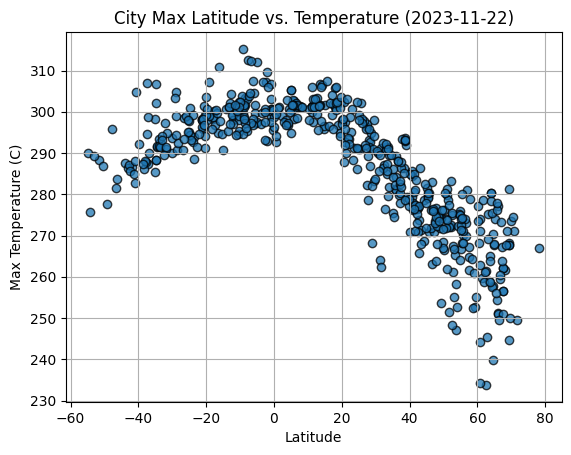

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-11-22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

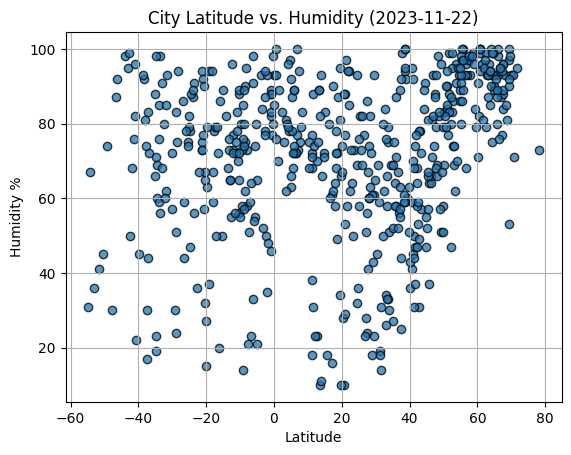

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-11-22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

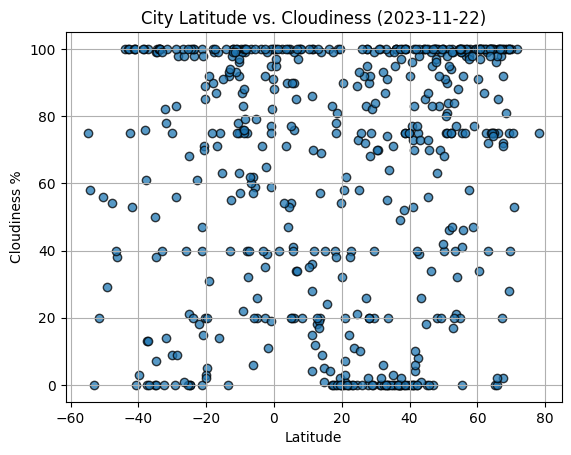

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-11-22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

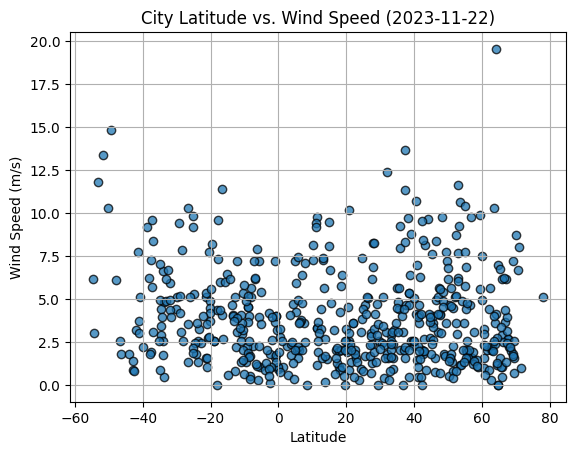

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-11-22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f'The r-value is: {r_value}')

    regression_line = slope * x + intercept
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, regression_line, color='red')
    plt.text(0.5, 0.9, equation, transform=plt.gca().transAxes, fontsize=15, color='red', ha='center')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,278.88,93,100,3.09,US,1700932651
2,hasaki,35.7333,140.8333,281.37,64,95,4.42,JP,1700932651
4,bodo,67.2800,14.4050,267.17,77,20,6.17,NO,1700932380
5,bethel,41.3712,-73.4140,277.05,50,0,3.60,US,1700932556
6,nova sintra,14.8667,-24.7167,295.78,72,5,9.48,CV,1700932577


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,275.82,67,58,3.03,GS,1700932651
3,invercargill,-46.4000,168.3500,283.72,92,38,1.79,NZ,1700932651
8,adamstown,-25.0660,-130.1015,295.04,82,68,9.82,PN,1700932651
9,port-aux-francais,-49.3500,70.2167,277.67,74,29,14.85,TF,1700932651
11,waitangi,-43.9535,-176.5597,287.49,98,100,1.79,NZ,1700932652


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8642984915787908


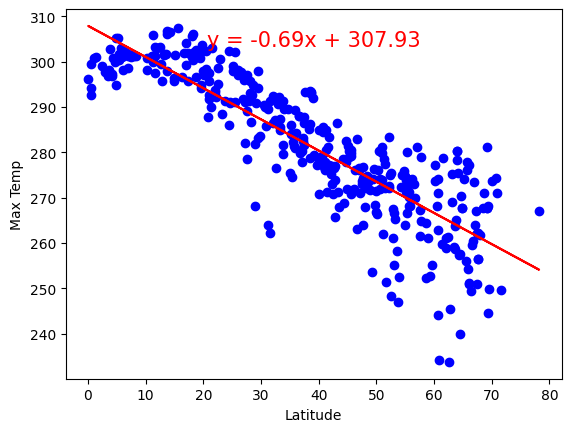

In [41]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

The r-value is: 0.6742799000984258


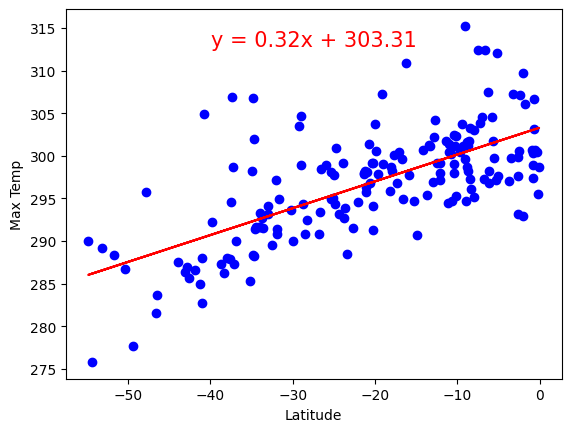

In [42]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE
For the northern hemisphere, when latitude is larger than or equal to 0, there is a negative correlation between latitude and max temp. As latitude increases, max temp tends to decrease. For the southern hemisphere, when latitude is less than 0, there is a positive correlation between latitude and max temp. As latitude decreases, max temp tends to increase. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3490078653703241


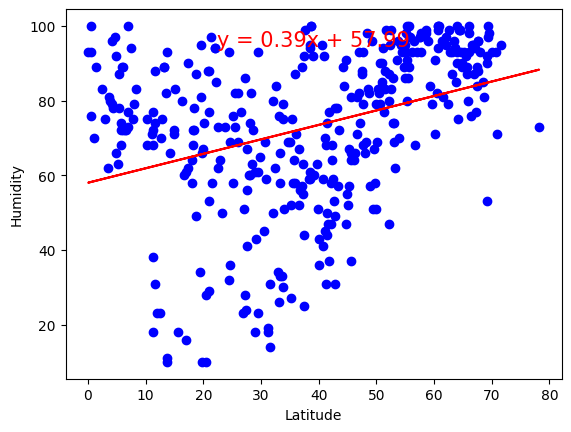

In [43]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.09656070823874799


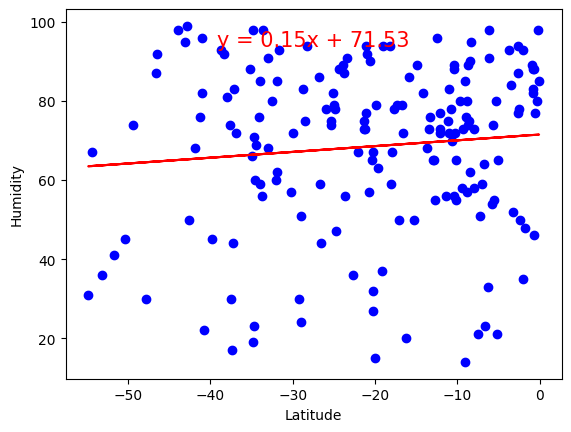

In [44]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The correlations between latitude and humidity is somewhat weak, as evident by the r-value, for both the northern and southern hemispheres. With that being said, I observe slight positive correlations between latitude and humidity for both hemispheres. This positive correlation seems stronger in the northern hemisphere than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26216293608467217


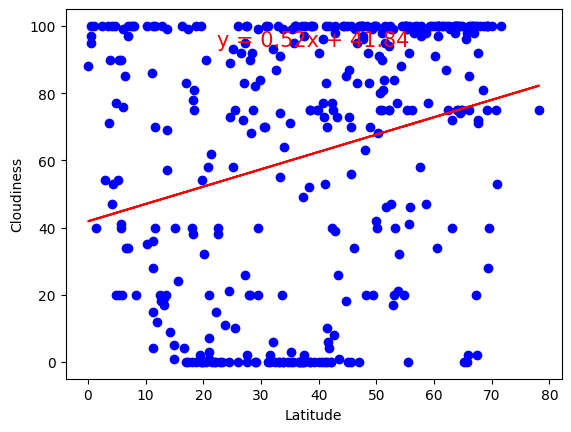

In [46]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.16590951215237934


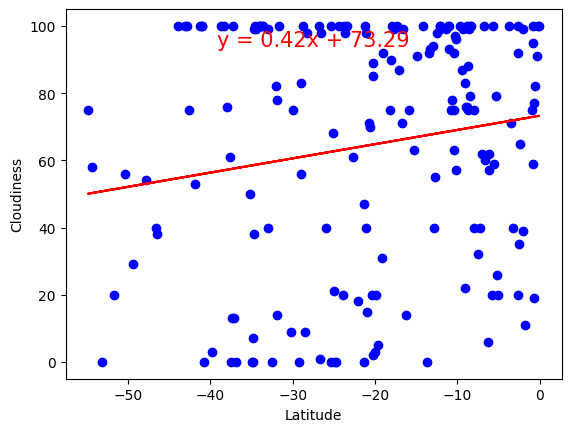

In [47]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The correlations between latitude and cloudiness is somewhat weak, as evident by the r-value, for both the northern and southern hemispheres. With that being said, I observe slight positive correlations between latitude and cloudiness for both hemispheres. This positive correlation seems stronger in the northern hemisphere than in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.054509000470169704


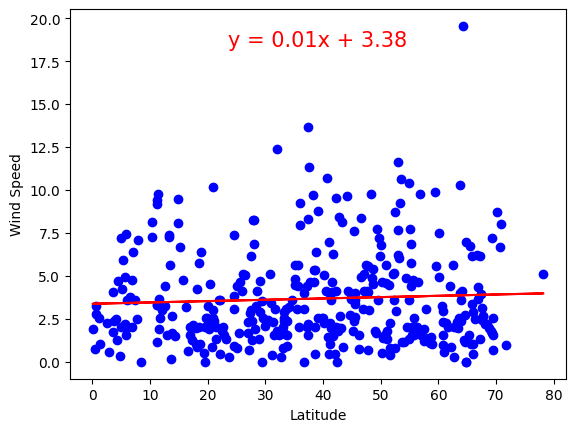

In [48]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.3243704937755403


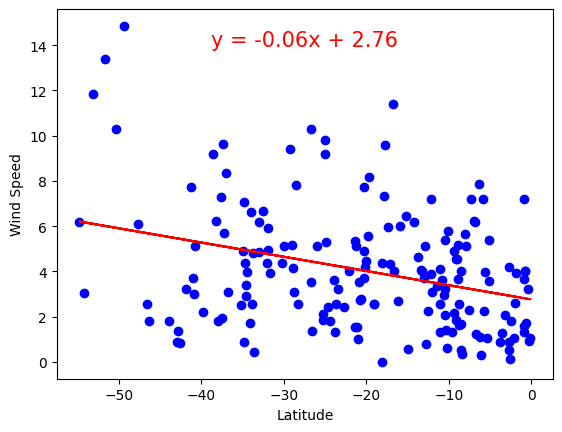

In [49]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** The correlations between latitude and Wind Speed is somewhat weak, as evident by the r-value, for both the northern and southern hemispheres. With that being said, I observe slight positive correlations between latitude and cloudiness for the northern hemisphere. For the southern hemisphere, I can see an even stronger negative correlation between latitude and Wind Speed.